# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [3]:
data = pd.read_csv("Boston.csv")

In [4]:
data.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Preprocessing

In [5]:
data.isnull().sum()

,0
Crime Rate,0
Residential Proportion,0
non-retail business acres/Town,0
Charles River,0
NO2 concentration,0
Average Rooms/Dwelling.,0
Prior Built Units Proportion,0
Distance to Employment Centres,0
Radial Highways Distance,0
ValueProperty/tax rate,0


In [6]:
for col in data.columns[:-1]:
    u = sum(data[col])/len(data[col])
    std = ((sum(data[col]**2)/len(data[col])) - (u**2))**0.5
    data[col] = (data[col] - u)/std

In [7]:
data

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


# Train Test Split

In [8]:
train_size = int(len(data)*0.8)
random_permuation = np.random.permutation(len(data))
train_rows = random_permuation[:train_size]
test_rows = random_permuation[train_size: ]
train_data = pd.DataFrame(np.array(data)[train_rows] , columns = data.columns)
test_data = pd.DataFrame(np.array(data)[test_rows] , columns = data.columns)

In [9]:
test_data

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,-0.413346,-0.487722,-0.984418,-0.272599,-0.973497,-0.550822,-0.578745,2.005372,-0.752922,-0.334008,0.159268,0.087013,0.002374,17.2
1,-0.404051,-0.487722,-0.616727,-0.272599,-0.921667,-0.164740,-2.203863,0.915493,-0.752922,-1.040783,-0.256858,0.292704,-0.959218,25.3
2,-0.277091,-0.487722,-0.437258,-0.272599,-0.144217,-0.203205,0.822342,0.086449,-0.637962,-0.601276,1.176466,0.441052,0.850425,15.2
3,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
4,-0.397779,-0.487722,-0.047680,-0.272599,-1.224009,-0.056465,-2.218087,0.709373,-0.637962,-0.613155,0.344213,0.224725,-0.716717,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.278125,-0.487722,1.231945,-0.272599,0.434551,0.937946,1.025037,-0.911636,-0.523001,-0.031105,-1.736418,0.074075,-1.130230,41.3
98,-0.386822,-0.487722,-0.079780,-0.272599,-0.567496,-1.243206,-2.090069,-0.098659,-0.637962,-0.779455,0.066796,-0.084908,2.368508,23.7
99,-0.419242,1.872854,-1.296664,-0.272599,-1.431329,0.239864,-1.304180,1.669619,-0.982843,-0.642851,-1.459000,0.417150,-0.619998,22.0
100,-0.289414,-0.487722,1.231945,3.668398,2.732346,-1.813070,0.690768,-1.038607,-0.523001,-0.031105,-1.736418,-0.146857,-0.074721,15.3


# Defining Class DesicionTreeRegressor

In [15]:
class Node:
    def __init__(self , val = None , left = None , right = None , col = None , threshold = None):
        self.val = val
        self.left = left
        self.right = right
        self.col = col
        self.threshold = threshold
class DesicionTreeRegressor:
    def __init__(self , x , target , max_depth = 10):
        self.x = x
        self.target = target
        self.max_depth = max_depth
    def std(self , x):
        u = sum(x)/len(x)
        return ((sum(x**2)/len(x)) - (u**2))**0.5
    def build_tree(self , curr_data , depth = 0):
        if(depth==self.max_depth): return Node(val = sum(curr_data[self.target])/(len(curr_data)))
        losses = []
        n = len(curr_data)
        for col in curr_data.columns:
            if(col==self.target): continue
            values = self.x[col].unique()
            best_threshold = None
            best_loss = 1e9
            for val in values:
                less_than = curr_data[curr_data[col]<val]
                grt_than = curr_data[curr_data[col] > val]
                if(len(less_than)==0 or len(grt_than)==0): continue
                less_loss = self.std(less_than[self.target])
                grt_loss = self.std(grt_than[self.target])
                final_loss = ((len(grt_than)*grt_loss) + (len(less_than)*less_loss))/n
                if(final_loss < best_loss):
                    best_threshold = val
                    best_loss = final_loss
            if(best_loss>=self.std(curr_data[self.target])): continue
            losses.append([best_loss , best_threshold , col])
        losses.sort()
        if(len(losses)==0): return Node(val = sum(curr_data[self.target])/(len(curr_data)))
        final_col = losses[0][2]
        final_threshold = losses[0][1]
        left_data = curr_data[curr_data[final_col] < final_threshold]
        right_data = curr_data[curr_data[final_col]>=final_threshold]
        ans = Node(col = final_col , threshold = final_threshold)
        ans.left = self.build_tree(left_data , depth+1)
        ans.right = self.build_tree(right_data , depth+1)
        return ans
    def train(self):
        self.root = self.build_tree(self.x)
        return
    def print_tree(self, curr, label="  ", depth=0):
      indent = "    " * depth
      if curr.val is not None:
          print(indent + label + str(curr.val))
          return
      else:
          print(indent + label + f"{curr.col} <= {curr.threshold}")
          self.print_tree(curr.left, "Less: ", depth + 1)
          self.print_tree(curr.right, "Greater: ", depth + 1)
    def predict(self , inp):
        inp = pd.DataFrame(inp , columns = self.x.columns)
        curr = self.root
        while(curr is not None):
            if(curr.val is not None): return curr.val
            elif(inp[curr.col][0] < curr.threshold): curr = curr.left
            else: curr = curr.right
        print("Cant find node")
        return

In [16]:
dr = DesicionTreeRegressor(data, "median home price" , max_depth = 2)

# Training a sample model (Ex: depth = 2)

In [17]:
dr.train()

In [18]:
dr.print_tree(dr.root)

  Teacher/town <= 0.8065758349537716
    Less: Average Rooms/Dwelling. <= 0.6302200080696764
        Less: 21.757918552036198
        Greater: 36.546067415730334
    Greater: non-retail business acres/Town <= 1.0159990707250284
        Less: 18.751020408163264
        Greater: 16.474149659863944


# Testing the Data and Pre Pruning(Early-Stop)

In [21]:
def root_mean_squared_error(y_true , y_pred):
    return (sum([(y_true[i]**2) - (y_pred[i]**2) for i in range(len(y_true))])/len(y_true))**0.5

Depth:  1  RMSE:  9.12138539784277
Depth:  2  RMSE:  5.982468680752958
Depth:  3  RMSE:  2.0650913228185206
Depth:  4  RMSE:  2.7712490906333405
Depth:  5  RMSE:  2.8022462307488922
Depth:  6  RMSE:  2.5602580731196696
Depth:  7  RMSE:  3.310470905872987


Text(0.5, 1.0, 'RMSE v/s Max Depth')

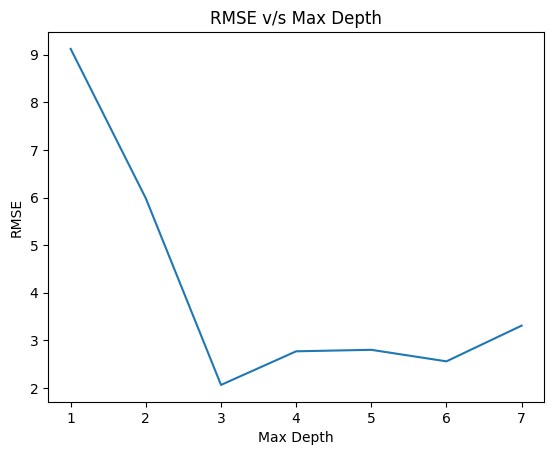

In [22]:
errors = []
y_true = test_data["median home price"]
for i in range(1,8):
    dr = DesicionTreeRegressor(train_data , "median home price" , max_depth = i)
    dr.train()
    y_pred = []
    for j in np.array(test_data):
        y_pred.append(dr.predict(j.reshape(1 , 14)))
    errors.append(root_mean_squared_error(y_true , y_pred))
    print("Depth: " , i , " RMSE: " , root_mean_squared_error(y_true , y_pred))
plt.plot([i for i in range(1,8)] , errors)
plt.xlabel("Max Depth")
plt.ylabel("RMSE")
plt.title("RMSE v/s Max Depth")

# Final Model Selected based on Pre Pruning Results (Max Depth = 3 , RMSE = 2.06)

In [23]:
final_model = DesicionTreeRegressor(train_data , "median home price" , max_depth = 3)

In [24]:
final_model.train()

In [26]:
final_model.print_tree(final_model.root)

  Teacher/town <= 0.8065758349537716
    Less: Average Rooms/Dwelling. <= 0.9493435515171365
        Less: Radial Highways Distance <= -0.5230014462035357
            Less: 22.338461538461537
            Greater: 22.440625
        Greater: Average Rooms/Dwelling. <= 1.6659468655978193
            Less: 33.156666666666666
            Greater: 46.595
    Greater: non-retail business acres/Town <= 1.0159990707250284
        Less: Teacher/town <= 1.1764658292771968
            Less: 20.7375
            Greater: 17.748
        Greater: NO2 concentration <= 0.6591472633012567
            Less: 18.180487804878048
            Greater: 15.943529411764706
